<a href="https://colab.research.google.com/github/ChandanaN09/Internship-Artificial-Intelligence-/blob/main/major_project_fruit_data_with_colors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import seaborn as sns

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [ ]:

df=pd.read_table("/content/drive/MyDrive/ai/Copy of fruit_data_with_colors.txt")

In [ ]:
df

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79
5,2,mandarin,mandarin,80,5.8,4.3,0.77
6,2,mandarin,mandarin,80,5.9,4.3,0.81
7,2,mandarin,mandarin,76,5.8,4.0,0.81
8,1,apple,braeburn,178,7.1,7.8,0.92
9,1,apple,braeburn,172,7.4,7.0,0.89


In [ ]:
df.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


In [ ]:
df.tail()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
54,4,lemon,unknown,116,6.1,8.5,0.71
55,4,lemon,unknown,116,6.3,7.7,0.72
56,4,lemon,unknown,116,5.9,8.1,0.73
57,4,lemon,unknown,152,6.5,8.5,0.72
58,4,lemon,unknown,118,6.1,8.1,0.70


In [ ]:
df.shape

(59, 7)

In [ ]:
df["fruit_name"].value_counts()

apple       19
orange      19
lemon       16
mandarin     5
Name: fruit_name, dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   fruit_label    59 non-null     int64  
 1   fruit_name     59 non-null     object 
 2   fruit_subtype  59 non-null     object 
 3   mass           59 non-null     int64  
 4   width          59 non-null     float64
 5   height         59 non-null     float64
 6   color_score    59 non-null     float64
dtypes: float64(3), int64(2), object(2)
memory usage: 3.4+ KB


In [ ]:
df.corr()

,fruit_label,mass,width,height,color_score
fruit_label,1.000000,0.032738,-0.298090,0.508766,-0.310521
mass,0.032738,1.000000,0.877687,0.609571,-0.079794
width,-0.298090,0.877687,1.000000,0.396848,-0.076576
height,0.508766,0.609571,0.396848,1.000000,-0.247047
color_score,-0.310521,-0.079794,-0.076576,-0.247047,1.000000


In [ ]:
df.corr()["mass"]

fruit_label    0.032738
mass           1.000000
width          0.877687
height         0.609571
color_score   -0.079794
Name: mass, dtype: float64

In [ ]:
df.corr()["color_score"]

fruit_label   -0.310521
mass          -0.079794
width         -0.076576
height        -0.247047
color_score    1.000000
Name: color_score, dtype: float64

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


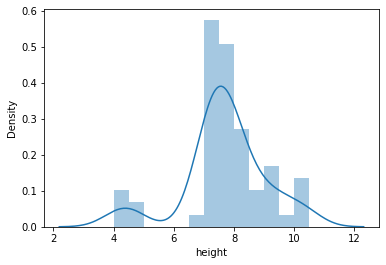

In [ ]:
sns.distplot(df["height"])
plt.show()

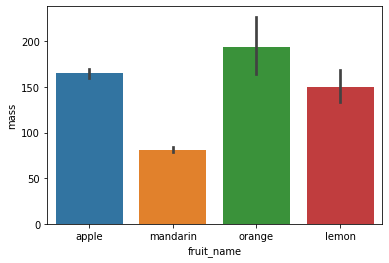

In [ ]:
sns.barplot(x=df["fruit_name"],y=df["mass"])

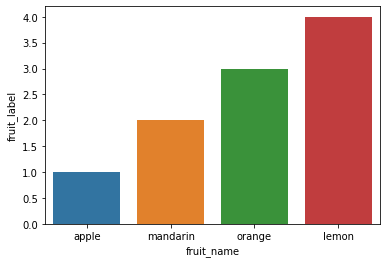

In [ ]:
sns.barplot(x=df["fruit_name"],y=df["fruit_label"])

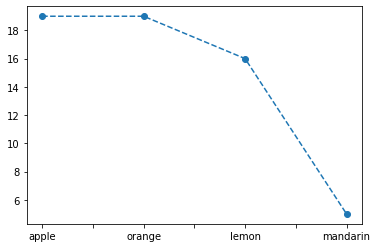

In [ ]:
df["fruit_name"].value_counts().plot(kind="line",linestyle="--",marker="o")

In [ ]:
df["color_score"].value_counts()

0.72    9
0.75    5
0.79    4
0.71    3
0.70    3
0.74    3
0.77    3
0.81    3
0.73    3
0.69    2
0.82    2
0.88    2
0.92    2
0.80    2
0.84    1
0.76    1
0.78    1
0.87    1
0.55    1
0.86    1
0.85    1
0.83    1
0.59    1
0.93    1
0.89    1
0.60    1
0.67    1
Name: color_score, dtype: int64

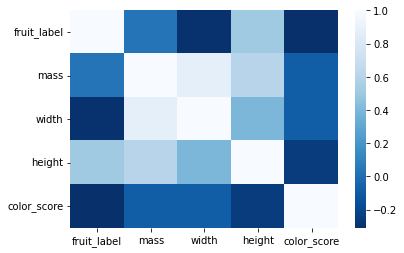

In [ ]:
sns.heatmap(df.corr(),cmap='Blues_r')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
df=df.drop(columns="fruit_label")
df=df.drop(columns="fruit_subtype")

In [ ]:
X=df.drop(columns="color_score")
X

,fruit_name,mass,width,height
0,apple,192,8.4,7.3
1,apple,180,8.0,6.8
2,apple,176,7.4,7.2
3,mandarin,86,6.2,4.7
4,mandarin,84,6.0,4.6
5,mandarin,80,5.8,4.3
6,mandarin,80,5.9,4.3
7,mandarin,76,5.8,4.0
8,apple,178,7.1,7.8
9,apple,172,7.4,7.0


In [ ]:
y=(df["color_score"])
y

0     0.55
1     0.59
2     0.60
3     0.80
4     0.79
5     0.77
6     0.81
7     0.81
8     0.92
9     0.89
10    0.93
11    0.92
12    0.88
13    0.70
14    0.69
15    0.69
16    0.67
17    0.73
18    0.83
19    0.85
20    0.86
21    0.84
22    0.87
23    0.88
24    0.75
25    0.75
26    0.74
27    0.77
28    0.72
29    0.81
30    0.79
31    0.82
32    0.80
33    0.74
34    0.75
35    0.75
36    0.76
37    0.79
38    0.77
39    0.75
40    0.78
41    0.79
42    0.82
43    0.70
44    0.72
45    0.72
46    0.71
47    0.72
48    0.72
49    0.73
50    0.71
51    0.72
52    0.72
53    0.74
54    0.71
55    0.72
56    0.73
57    0.72
58    0.70
Name: color_score, dtype: float64

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [ ]:
X.shape

(59, 4)

In [ ]:
X_train.shape

(47, 4)

In [ ]:
X_test.shape

(12, 4)

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score,mean_absolute_error

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor

In [ ]:
step1=ColumnTransformer(transformers=[("col_tnf",OneHotEncoder(sparse=False),[0])]
,remainder="passthrough")
step2=LinearRegression()
pipe=Pipeline([("step1",step1),("step2",step2)])
pipe.fit(X_train,y_train)
y_pred=pipe.predict(X_test)
print(r2_score(y_test,y_pred))
print(mean_absolute_error(y_test,y_pred))


0.08952921048839058
0.054282124175089784


In [ ]:
step1=ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False),[0])
    ],remainder='passthrough')
step2=KNeighborsRegressor()
pipe=Pipeline([('step1',step1),('step2',step2)])
pipe.fit(X_train,y_train)
y_pred=pipe.predict(X_test)
print(r2_score(y_test,y_pred))
print(mean_absolute_error(y_test,y_pred))

0.023430571761960062
0.05516666666666667


In [ ]:
step1=ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False),[0])
    ],remainder='passthrough')
step2=SVR(C=10000)
pipe=Pipeline([('step1',step1),('step2',step2)])
pipe.fit(X_train,y_train)
y_pred=pipe.predict(X_test)
print(r2_score(y_test,y_pred))
print(mean_absolute_error(y_test,y_pred))

0.16874564849350127
0.0636021172601711


In [ ]:
step1=ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False),[0])
    ],remainder='passthrough')
step2=DecisionTreeRegressor(max_depth=3)
pipe=Pipeline([('step1',step1),('step2',step2)])
pipe.fit(X_train,y_train)
y_pred=pipe.predict(X_test)
print(r2_score(y_test,y_pred))
print(mean_absolute_error(y_test,y_pred))

0.15889156129196158
0.05087301587301588


In [ ]:
step1=ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False),[0])
    ],remainder='passthrough')
step2=AdaBoostRegressor(n_estimators=90)
pipe=Pipeline([('step1',step1),('step2',step2)])
pipe.fit(X_train,y_train)
y_pred=pipe.predict(X_test)
print(r2_score(y_test,y_pred))
print(mean_absolute_error(y_test,y_pred))

0.29052644457438115
0.04777957564778216


In [ ]:
step1=ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False),[0])
    ],remainder='passthrough')
step2=GradientBoostingRegressor(n_estimators=88)
pipe=Pipeline([('step1',step1),('step2',step2)])
pipe.fit(X_train,y_train)
y_pred=pipe.predict(X_test)
print(r2_score(y_test,y_pred))
print(mean_absolute_error(y_test,y_pred))

0.3396173043436971
0.03923110056636689


In [ ]:
step1=ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False),[0])
    ],remainder='passthrough')
step2=RandomForestRegressor(n_estimators=23)
pipe=Pipeline([('step1',step1),('step2',step2)])
pipe.fit(X_train,y_train)

y_pred=pipe.predict(X_test)
print(r2_score(y_test,y_pred))
print(mean_absolute_error(y_test,y_pred))

0.04878979514859383
0.055144927536231896


In [ ]:

df['fruit_name'].value_counts()

apple       19
orange      19
lemon       16
mandarin     5
Name: fruit_name, dtype: int64

In [ ]:
apple_data=df[df["fruit_name"]=="apple"]

In [ ]:
apple_data.head()

,fruit_name,mass,width,height,color_score
0,apple,192,8.4,7.3,0.55
1,apple,180,8.0,6.8,0.59
2,apple,176,7.4,7.2,0.60
8,apple,178,7.1,7.8,0.92
9,apple,172,7.4,7.0,0.89


In [ ]:
orange_data=df[df["fruit_name"]=="orange"]

In [ ]:
orange_data.head()

,fruit_name,mass,width,height,color_score
24,orange,342,9.0,9.4,0.75
25,orange,356,9.2,9.2,0.75
26,orange,362,9.6,9.2,0.74
27,orange,204,7.5,9.2,0.77
28,orange,140,6.7,7.1,0.72


In [ ]:
lemon_data=df[df["fruit_name"]=="lemon"]

In [ ]:
lemon_data.head()

,fruit_name,mass,width,height,color_score
43,lemon,194,7.2,10.3,0.70
44,lemon,200,7.3,10.5,0.72
45,lemon,186,7.2,9.2,0.72
46,lemon,216,7.3,10.2,0.71
47,lemon,196,7.3,9.7,0.72


In [ ]:
mandarin_data=df[df["fruit_name"]=="mandarin"]

In [ ]:
mandarin_data.head()

,fruit_name,mass,width,height,color_score
3,mandarin,86,6.2,4.7,0.80
4,mandarin,84,6.0,4.6,0.79
5,mandarin,80,5.8,4.3,0.77
6,mandarin,80,5.9,4.3,0.81
7,mandarin,76,5.8,4.0,0.81


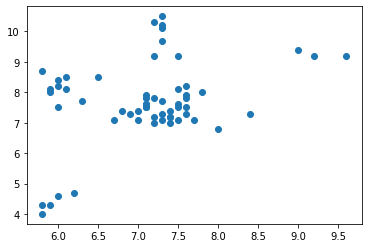

In [ ]:
plt.scatter(df["width"],df["height"])

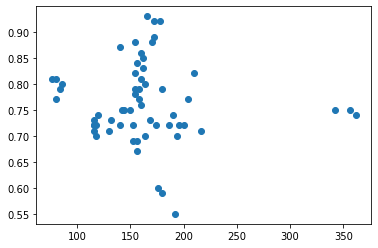

In [ ]:

plt.scatter(df["mass"],df["color_score"])

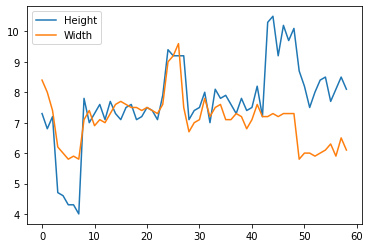

In [ ]:
plt.plot(df["height"],label="Height")
plt.plot(df["width"],label="Width")
plt.legend()

In [ ]:
X_train.describe()

,mass,width,height
count,47.000000,47.000000,47.000000
mean,164.510638,7.121277,7.589362
std,59.774166,0.834562,1.414403
min,76.000000,5.800000,4.000000
25%,141.000000,6.650000,7.200000
50%,158.000000,7.200000,7.600000
75%,177.000000,7.500000,8.150000
max,362.000000,9.600000,10.500000


In [ ]:
X_test.describe()

,mass,width,height
count,12.000000,12.000000,12.000000
mean,157.666667,7.041667,8.100000
std,31.285586,0.775134,1.083764
min,116.000000,5.900000,6.800000
25%,135.000000,6.550000,7.375000
50%,159.000000,7.100000,7.900000
75%,175.500000,7.375000,8.425000
max,216.000000,8.400000,10.200000


In [ ]:
y_train.describe()

count    47.000000
mean      0.772553
std       0.071520
min       0.600000
25%       0.720000
50%       0.760000
75%       0.815000
max       0.930000
Name: color_score, dtype: float64

In [ ]:
y_test.describe()

count    12.000000
mean      0.725000
std       0.088266
min       0.550000
25%       0.710000
50%       0.725000
75%       0.760000
max       0.880000
Name: color_score, dtype: float64